<a href="https://www.kaggle.com/code/vladlena321/feature-importance-parkinson-s-disease-symptoms?scriptVersionId=222372450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.grid'] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [4]:
del df['DoctorInCharge']
del df['PatientID']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

In [6]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


## Random Forest

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Определение признаков и целевой переменной
X = df.drop('Diagnosis', axis=1)  # Признаки
y = df['Diagnosis']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Важность факторов
importances = model.feature_importances_

# Создание DataFrame для важности факторов
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Сортировка факторов по важности
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
22                     UPDRS    0.234635
24      FunctionalAssessment    0.098321
23                      MoCA    0.082739
25                    Tremor    0.076425
26                  Rigidity    0.037704
8                DietQuality    0.033319
27              Bradykinesia    0.031158
9               SleepQuality    0.031011
21  CholesterolTriglycerides    0.030793
20            CholesterolHDL    0.030726
18          CholesterolTotal    0.030464
19            CholesterolLDL    0.030371
4                        BMI    0.030174
16                SystolicBP    0.029667
6         AlcoholConsumption    0.029245
0                        Age    0.029099
7           PhysicalActivity    0.028677
17               DiastolicBP    0.025837
28       PosturalInstability    0.019496
3             EducationLevel    0.010076
2                  Ethnicity    0.008669
14                Depression    0.005729
1                     Gender    0.005010
5               

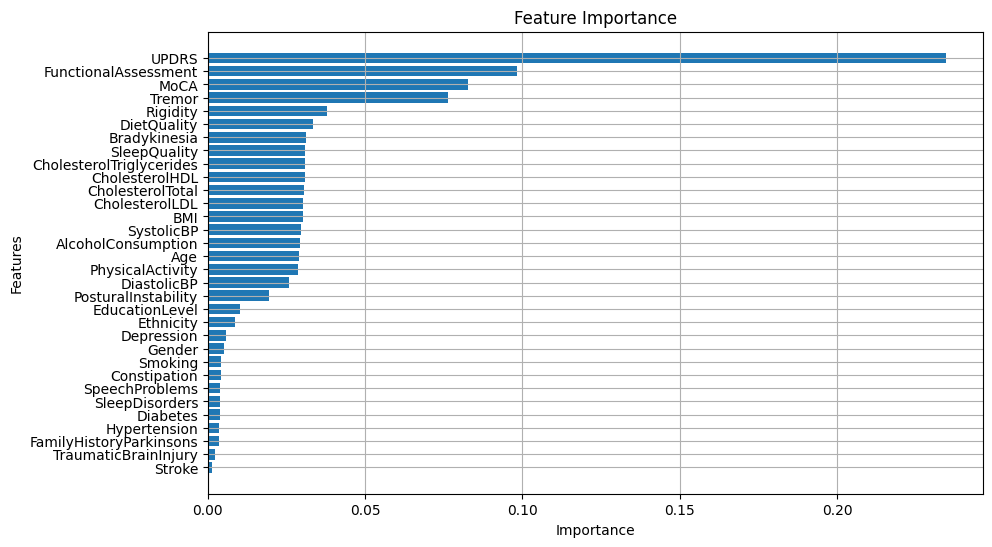

In [9]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))

plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [11]:
# Предсказания на тестовых данных
y_pred = model.predict(X_test)

In [12]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[133  17]
 [ 27 244]]


In [13]:
# Отчет по классификации
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       150
           1       0.93      0.90      0.92       271

    accuracy                           0.90       421
   macro avg       0.88      0.89      0.89       421
weighted avg       0.90      0.90      0.90       421



In [14]:
# ROC-кривая и AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.2f}')

AUC: 0.95


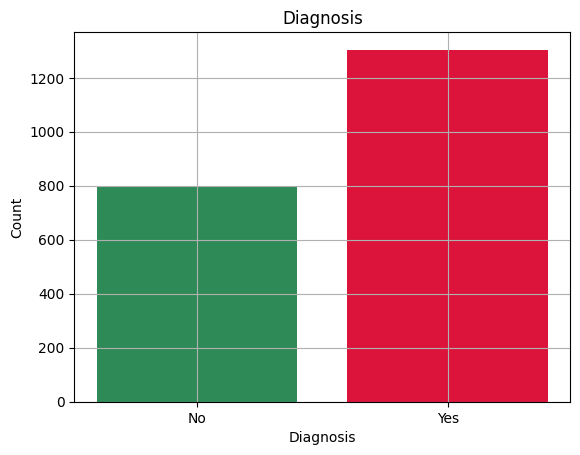

In [15]:
data = pd.DataFrame(df)

# Подсчет количества значений 0 и 1
counts = data['Diagnosis'].value_counts()

# Построение столбчатой диаграммы
plt.bar(counts.index, counts.values, color=['#DC143C', '#2E8B57'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis')
plt.show()

## SHAP-интерпретация модели

In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import shap

Accuracy: 0.91
AUC: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       150
           1       0.96      0.90      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.92       421

Confusion Matrix:
[[141   9]
 [ 27 244]]


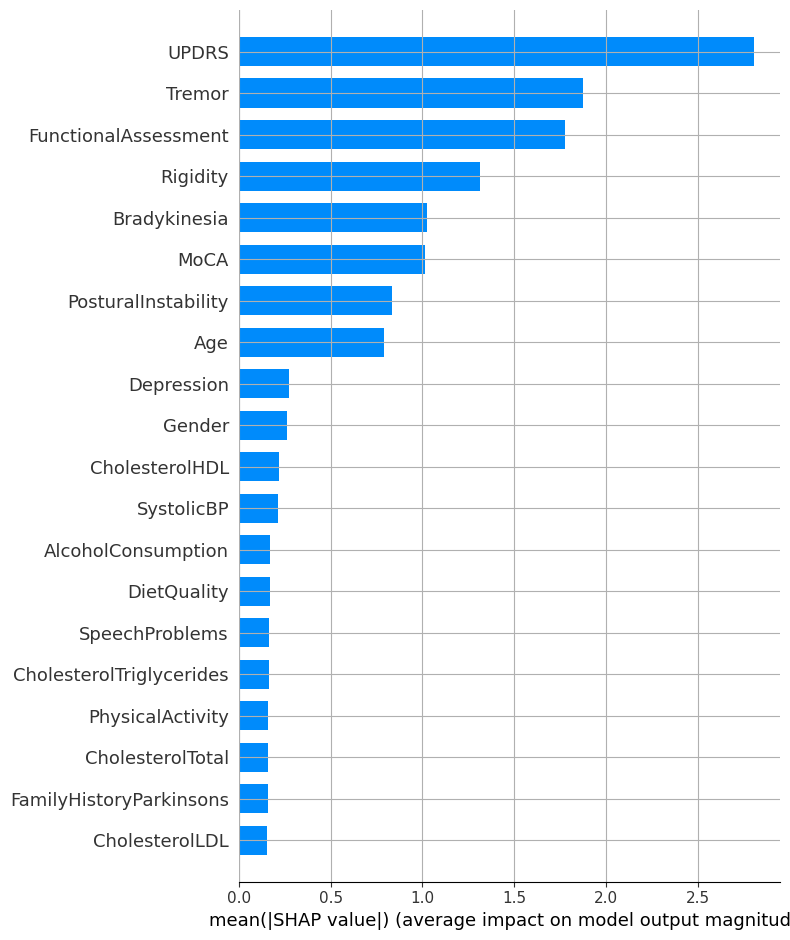

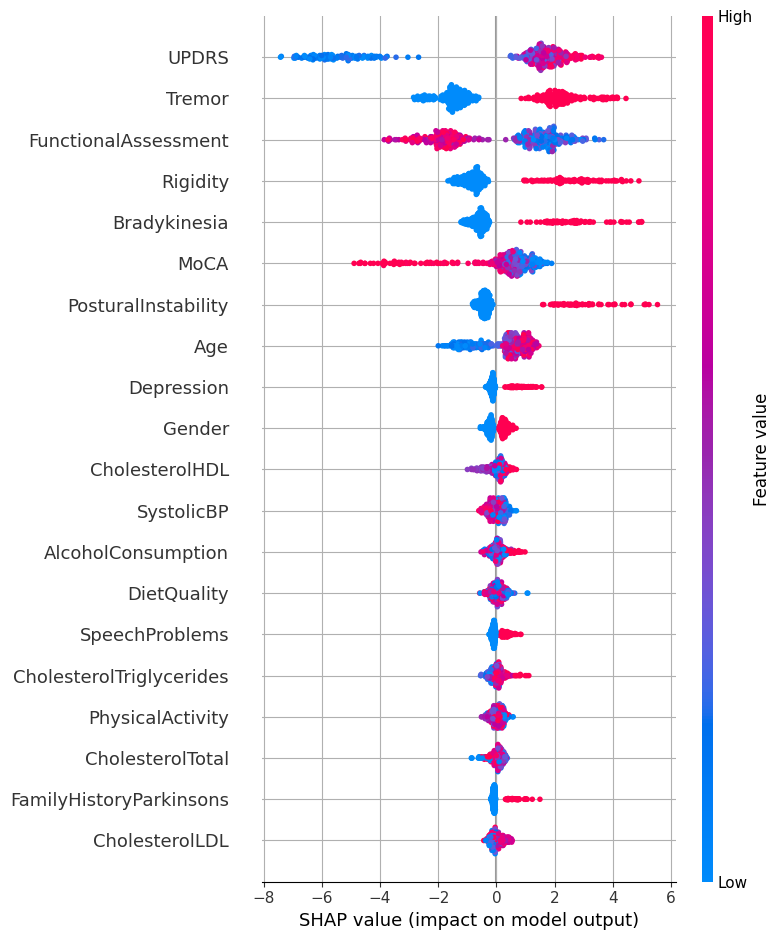

In [17]:
# Определение признаков и целевой переменной
X = df.drop('Diagnosis', axis=1)  # Полный набор признаков
y = df['Diagnosis']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Создание и обучение модели XGBoost
best_model = XGBClassifier()
best_model.fit(X_train_res, y_train_res)

# Оценка модели
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(conf_matrix)

# Использование SHAP для интерпретации модели
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Визуализация важности признаков с помощью бар-графика
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Визуализация всех значений SHAP
shap.summary_plot(shap_values, X_test)